### Student Information
Name: 丁緒慈

Student ID: 108062201

GitHub ID: Irene-Ting

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# First
Please refer to Lab1-Master submodule

# Second

## 1. Data Transformation

### 1.1 Converting Dictionary into Pandas Dataframe

In [2]:
import pandas as pd
amazon=pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None, names=["sentence", "score"])
amazon[:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


### 1.2 Adding Columns

In [3]:
amazon['sentiment'] = amazon.score.apply(
    lambda t: 'positive' if t == 1 else 'negative')
amazon[:10]


,sentence,score,sentiment
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
5,I have to jiggle the plug to get it to line up...,0,negative
6,If you have several dozen or several hundred c...,0,negative
7,If you are Razr owner...you must have this!,1,positive
8,"Needless to say, I wasted my money.",0,negative
9,What a waste of money and time!.,0,negative


## 2. Data Mining using Pandas

### 2.1 Missing Values

In [4]:
import helpers.data_mining_helpers as dmh

amazon.isnull()
amazon.isnull().apply(lambda x: dmh.check_missing_values(x))


,sentence,score,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 2.2 Dealing with Duplicate Data

In [5]:
sum(amazon.duplicated())

10

In [6]:
amazon.drop_duplicates(keep=False, inplace=True)
sum(amazon.duplicated())

0

## 3. Data Preprocessing

### 3.1 Sampling

In [7]:
sample_size = len(amazon) * 0.1
amazon_sample = amazon.sample(n=int(sample_size)) 

positive    51
negative    47
Name: sentiment, dtype: int64


<AxesSubplot: title={'center': 'amazon'}>

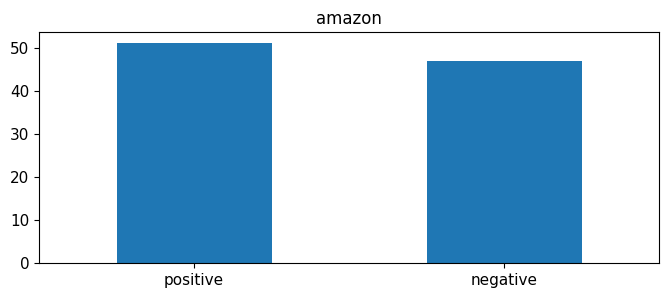

In [8]:
import matplotlib.pyplot as plt
print(amazon_sample.sentiment.value_counts())
amazon_sample.sentiment.value_counts().plot(kind='bar', title = 'amazon', rot = 0, fontsize = 11, figsize = (8,3))

### 3.2 Feature Creation

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/hsutzu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
amazon['unigrams'] = amazon['sentence'].apply(lambda x: dmh.tokenize_text(x))
amazon[0:5]["unigrams"]


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

### 3.3 Feature subset selection

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

count_vect = CountVectorizer()
amazon_counts = count_vect.fit_transform(amazon.sentence)

# select first 20 sentences
plot_y = ["doc_" + str(i) for i in list(amazon.index)[0:20]]

# select the most frequently 20 terms in these sentences
count_arr = amazon_counts[0:20, :].toarray()
total = [sum(count_arr[:, i]) for i in range(amazon_counts.shape[1])]
total = np.array(total)
term_ind = np.argpartition(total, -20)[-20:]
plot_x = ["term_"+str(i) for i in term_ind]

plot_z = amazon_counts[0:20, term_ind].toarray()


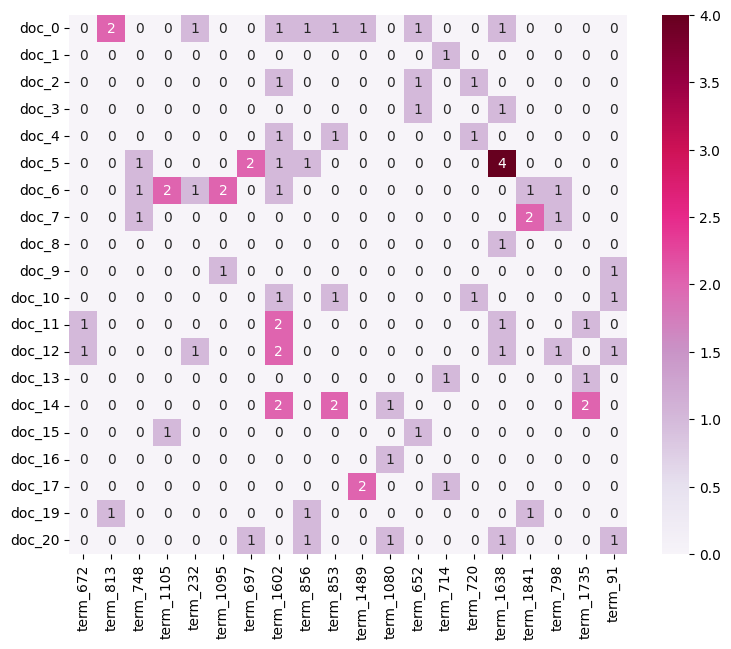

In [12]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", annot=True)


### 3.4 Dimensionality Reduction

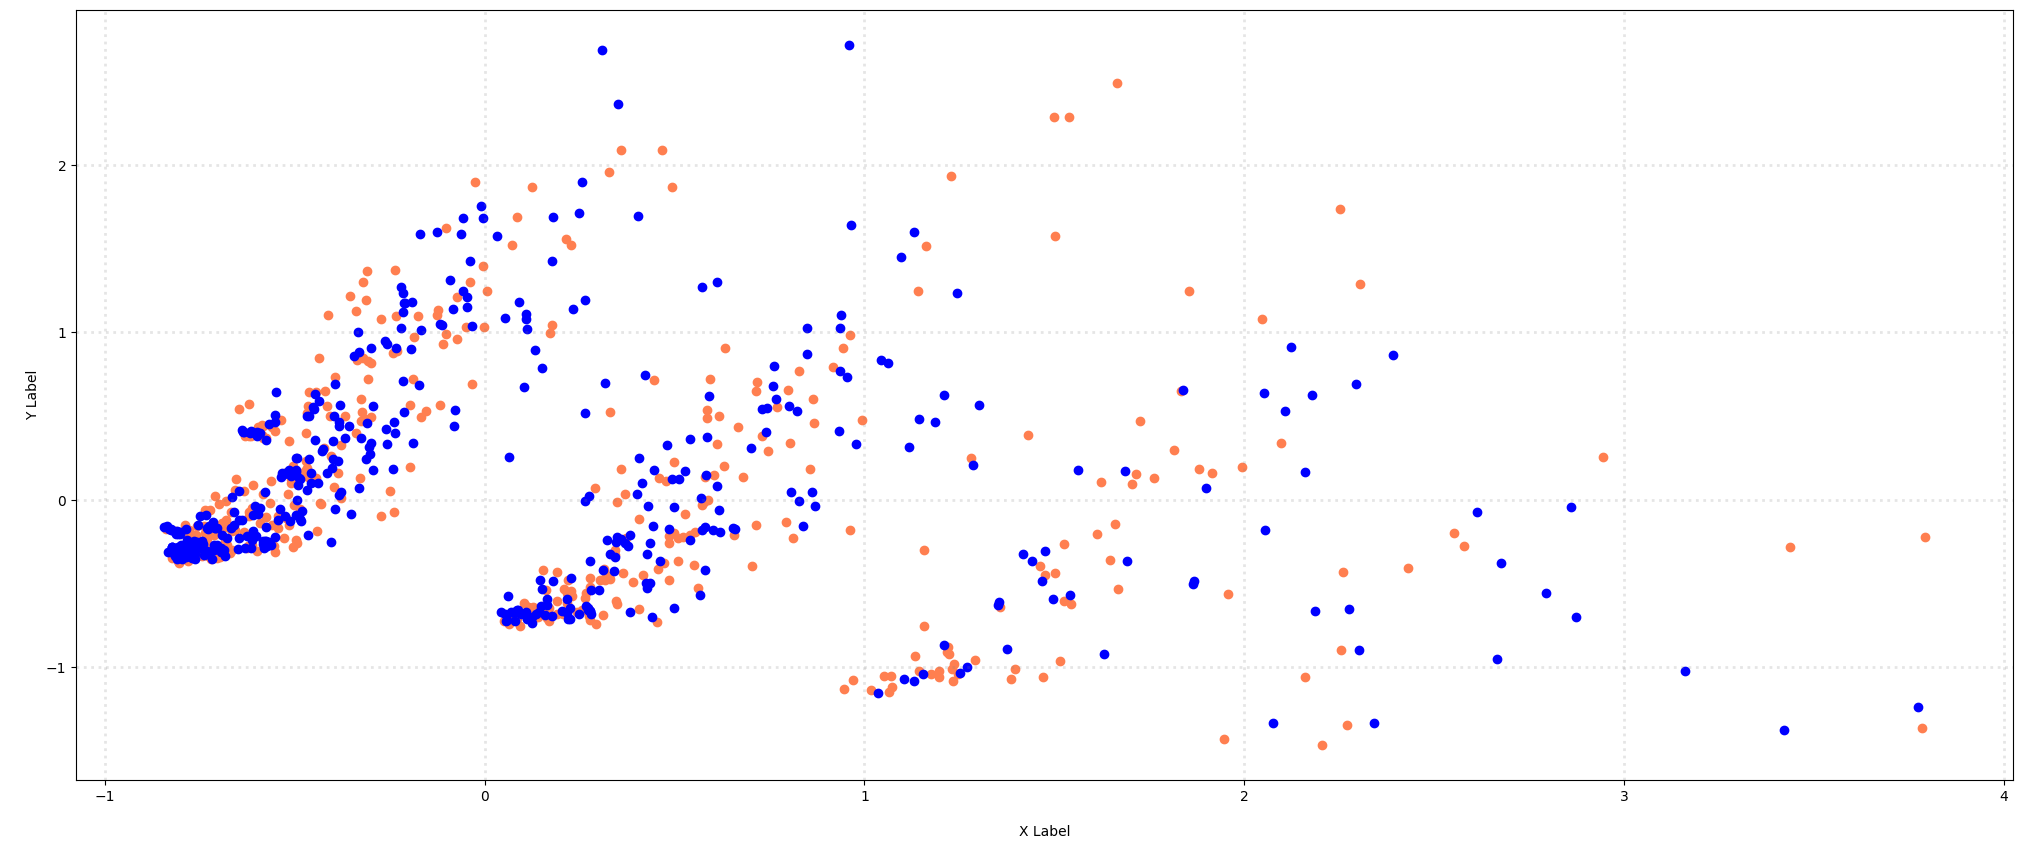

In [13]:
from sklearn.decomposition import PCA

amazon_reduced = PCA(n_components=2).fit_transform(amazon_counts.toarray())
col = ['coral', 'blue']
scores = [0, 1]

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = amazon_reduced[amazon['score'] == score].T[0]
    ys = amazon_reduced[amazon['score'] == score].T[1]

    ax.scatter(xs, ys, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


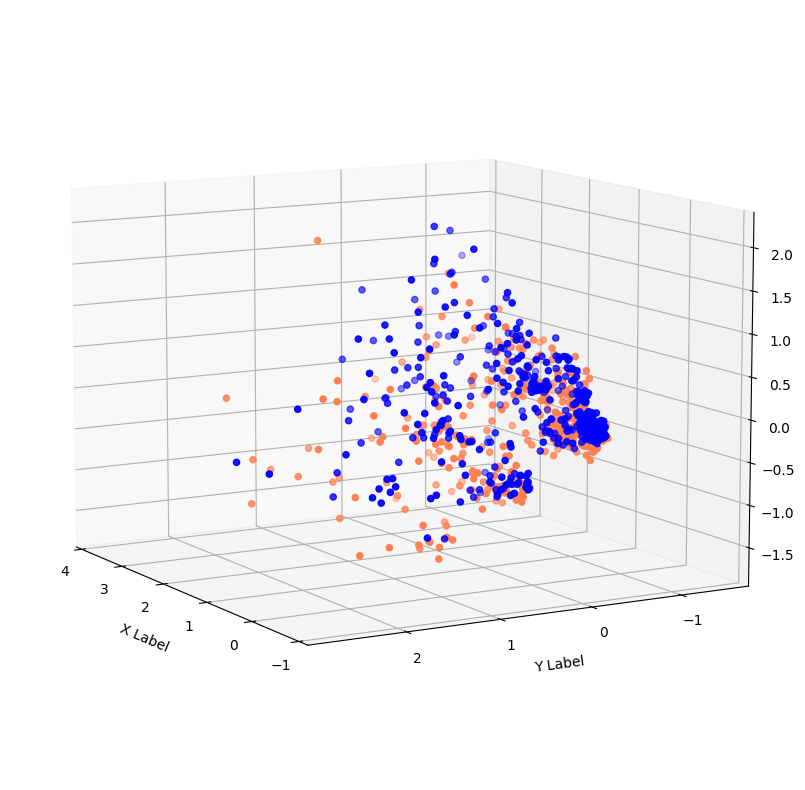

In [14]:
import random
import matplotlib.pyplot as plt
amazon_reduced = PCA(n_components=3).fit_transform(amazon_counts.toarray())


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
col = ['coral', 'blue']
scores = [0, 1]

for c, score in zip(col, scores):
    xs = amazon_reduced[amazon['score'] == score].T[0]
    ys = amazon_reduced[amazon['score'] == score].T[1]
    zs = amazon_reduced[amazon['score'] == score].T[2]
    ax.scatter(xs, ys, zs, c=c)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# In this camera position, we can see that it is similar to 2D visualization
ax.view_init(elev=10, azim=150)
plt.show()


### 3.5 Attribute Transformation / Aggregation

In [15]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,amazon_counts.shape[1]):
    term_frequencies.append(sum(amazon_counts[:,j].toarray()))

In [16]:
term_frequencies = np.asarray(amazon_counts.sum(axis=0))[0]


In [17]:
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
             y=term_frequencies[:300])
fig.show()


In [18]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

fig = px.bar(x=count_vect.get_feature_names_out()[:300],
             y=term_frequencies_log[:300])
fig.show()

In [19]:
term_ind = np.argpartition(term_frequencies, -300)[-300:]
term_ind = term_ind[np.argsort(term_frequencies[term_ind])][::-1]
fig = px.bar(x=count_vect.get_feature_names_out()[term_ind],
             y=term_frequencies[term_ind])
fig.show()

### 3.6 Discretization and Binarization

In [20]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(amazon.score)
amazon['bin_score'] = mlb.transform(amazon['score']).tolist()
amazon[0:9]

,sentence,score,sentiment,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## 4. Data Exploration

In [21]:
document_to_transform_1 = []
random_record_1 = amazon.iloc[0]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = amazon.iloc[1]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = amazon.iloc[2]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)


In [22]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(
    document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(
    document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(
    document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(
    document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(
    document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(
    document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %
      {"x": cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %
      {"x": cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %
      {"x": cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %
      {"x": cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %
      {"x": cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % 
      {"x": cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.218218
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third

## Part1: Generate meaningful data visualizations

### Idea 1: Cosine Similarity between Positive & Negative Sentences

In [24]:
from sklearn.preprocessing import binarize

# query positive & negative sentences

amazon = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt',
                     sep='\t', header=None, names=["sentence", "score"])
amazon_pos = amazon[amazon['score'] == 1]
amazon_neg = amazon[amazon['score'] == 0]

imdb = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt',
                     sep='\t', header=None, names=["sentence", "score"])
imdb_pos = imdb[imdb['score'] == 1]
imdb_neg = imdb[imdb['score'] == 0]

yelp = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt',
                     sep='\t', header=None, names=["sentence", "score"])
yelp_pos = yelp[yelp['score'] == 1]
yelp_neg = yelp[yelp['score'] == 0]


In [25]:
# combine positive & negative sentences into a document

amazon_pos_doc = ','.join(amazon_pos[:]['sentence'])
amazon_neg_doc = ','.join(amazon_neg[:]['sentence'])
imdb_pos_doc = ','.join(imdb_pos[:]['sentence'])
imdb_neg_doc = ','.join(imdb_neg[:]['sentence'])
yelp_pos_doc = ','.join(yelp_pos[:]['sentence'])
yelp_neg_doc = ','.join(yelp_neg[:]['sentence'])


In [26]:
# do vector count for each document

amazon_pos_vector_count = count_vect.transform([amazon_pos_doc])
amazon_neg_vector_count = count_vect.transform([amazon_neg_doc])
imdb_pos_vector_count = count_vect.transform([imdb_pos_doc])
imdb_neg_vector_count = count_vect.transform([imdb_neg_doc])
yelp_pos_vector_count = count_vect.transform([yelp_pos_doc])
yelp_neg_vector_count = count_vect.transform([yelp_neg_doc])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

vector_counts = [amazon_pos_vector_count,
                 amazon_neg_vector_count, imdb_pos_vector_count, imdb_neg_vector_count, yelp_pos_vector_count, yelp_neg_vector_count]

cos_sim = []

for vc1 in vector_counts:
    cos_sim_tmp = []
    for vc2 in vector_counts:
        cos_sim_tmp.append(cosine_similarity(vc1, vc2, dense_output=True)[0][0])
    cos_sim.append(cos_sim_tmp)


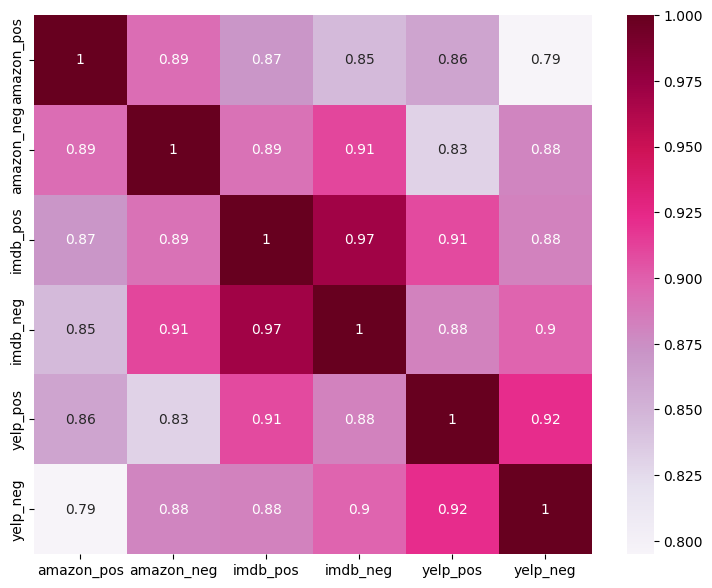

In [28]:
import random
import numpy as np

# visualize

vc = ['amazon_pos', 'amazon_neg', 'imdb_pos', 'imdb_neg', 'yelp_pos', 'yelp_neg']

df_todraw = pd.DataFrame(cos_sim, columns=vc, index=vc)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", annot=True)


### Idea 2: Word Cloud

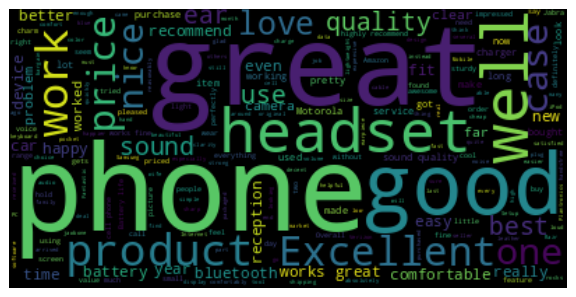

In [29]:
from wordcloud import WordCloud
word_cloud = WordCloud().generate(amazon_pos_doc)
plt.figure(figsize=(8, 6), dpi=90)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


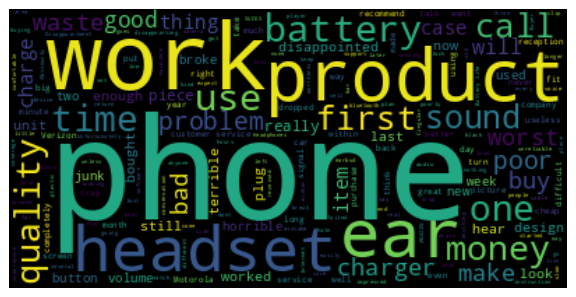

In [30]:
word_cloud = WordCloud().generate(amazon_neg_doc)
plt.figure(figsize=(8, 6), dpi=90)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Part 2: TF-IDF Features

### 2.1 Heatmap Visualization

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
amazon_tfidf = tfidf_vec.fit_transform(amazon.sentence)
print(amazon_tfidf)


  (0, 367)	0.32963001716066015
  (0, 233)	0.26091937133842197
  (0, 711)	0.2724001479983455
  (0, 1702)	0.2979650306857509
  (0, 1714)	0.3111071874869957
  (0, 1604)	0.09065770616075083
  (0, 762)	0.2877711819152493
  (0, 814)	0.3156148341874833
  (0, 857)	0.10744287763403453
  (0, 1212)	0.24777721453717727
  (0, 1640)	0.12694625638326024
  (0, 993)	0.2074671011294888
  (0, 653)	0.1449316337525006
  (0, 1766)	0.26630004421084175
  (0, 1074)	0.21424736019492926
  (0, 854)	0.11680650225372383
  (0, 1609)	0.22925438486351277
  (0, 1491)	0.19164819187071497
  (1, 1733)	0.6392095406476104
  (1, 569)	0.47823718132718357
  (1, 259)	0.4710276120116065
  (1, 715)	0.3752776975307017
  (2, 864)	0.7933399057616529
  (2, 721)	0.4042788970415545
  (2, 1604)	0.24137858022000805
  :	:
  (997, 474)	0.40169250815766483
  (997, 1189)	0.5150303228080787
  (997, 1081)	0.27555279938199023
  (998, 852)	0.38012710925679305
  (998, 1221)	0.38012710925679305
  (998, 829)	0.38012710925679305
  (998, 453)	0.38012

In [32]:
# select first 20 sentences
plot_y = ["doc_" + str(i) for i in list(amazon.index)[0:20]]

# select the 20 terms with higher tfidf
tfidf_arr = amazon_tfidf[0:20, :].toarray()
total = [sum(tfidf_arr[:, i]) for i in range(amazon_tfidf.shape[1])]
total = np.array(total)
term_ind = np.argpartition(total, -20)[-20:]
plot_x = ["term_"+str(i) for i in term_ind]

plot_z = amazon_tfidf[0:20, term_ind].toarray()


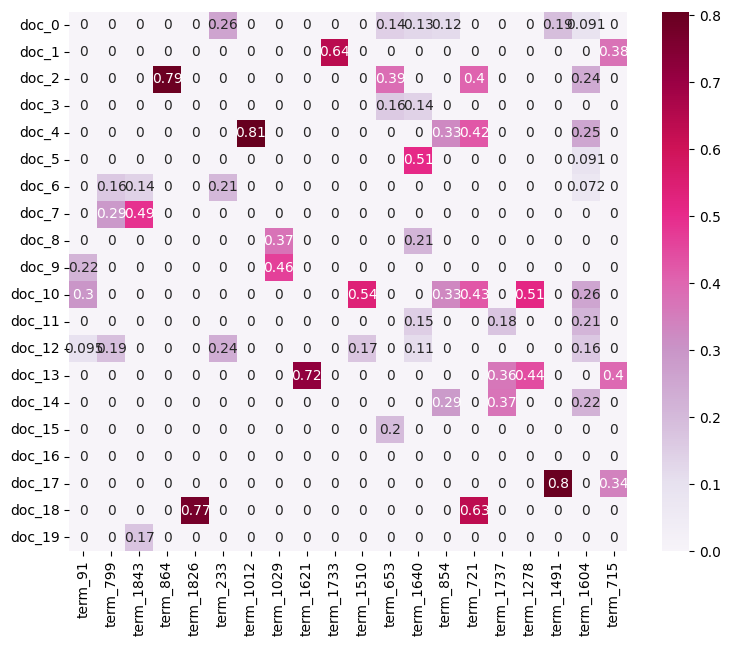

In [33]:
import seaborn as sns

# visualize by heatmap
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", annot=True)


### 2.2 Long Tail & Log Distribution

In [34]:
tfidf = []
for j in range(0, amazon_tfidf.shape[1]):
    tfidf.append(sum(amazon_tfidf[:,j].toarray()))

In [35]:
tfidf = np.asarray(amazon_tfidf.sum(axis=0))[0]

In [36]:
import math
term_ind = np.argpartition(tfidf, -600)[-600:]
term_ind = term_ind[np.argsort(tfidf[term_ind])][::-1]

# transform into log distribution
tfidf_log = [math.log(tfidf[i]) for i in term_ind]

fig = px.bar(x=tfidf_vec.get_feature_names_out()[term_ind], y=tfidf_log)

fig.show()

## Part 3: Naive Bayes Classifier
Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

### Setup

In [37]:
len(amazon)

1000

In [38]:
from sklearn.naive_bayes import MultinomialNB

X_train = amazon[:800]['sentence']
y_train = amazon[:800]['score']
X_test = amazon[-200:]['sentence']
answer = amazon[-200:]['score']

### TF-IDF Features

In [39]:
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

mnb_tfidf = MultinomialNB()

mnb_tfidf.fit(X_train_tfidf, y_train)
tfidf_pred = mnb_tfidf.predict(X_test_tfidf)

mnb_tfidf.score(X_test_tfidf, answer)

0.81

### Word Frequency Features

In [40]:
X_train_freq = count_vect.fit_transform(X_train)
X_test_freq = count_vect.transform(X_test)

mnb_freq = MultinomialNB()

mnb_freq.fit(X_train_freq, y_train)
freq_pred = mnb_freq.predict(X_test_freq)

mnb_tfidf.score(X_test_freq, answer)


0.775

### Comment
TF-IDF Features provide better result because TF-IDF considers word frequency in general. For example, the word, 'and', frequently exists. Therefore, we gain less information even if we know this document includes a lot(few) of 'and'. In this case, 'and' should not deserve high score though its frequency is high. TF-IDF provides the score more meaningful. 

# Fourth
- Not ideal part

1. I don't think using helper functions is a good idea in lab because Python already provides many powerful functions(compared with C/C++). Or TA may explain the helper functions first before using them.
2. I feel that (lab-master)1~3 are related to basic Python & Pandas while (lab-master)4~6 are related to data mining. So I think 1~3 can be self-study part. After most students understand 1~3, the pace of finishing lab during lecture might be more similar.

- The most efficient/meaningful part

1. I like the structure of the lab. It is clear and complete, includes multiple data preprocessing methods. It's great to understand the concepts and then implement them through Python.
2. CountVectorizer and TfidfVectorizer are meaningful for me. They help us transform the unstructure data into the data that can be easily used. 

- What are those inefficient parts you noticed?

1. Although we don't need to collect data, I think it's also a hard work.
2. In real world, dealing with missing values and duplicate values might be inefficient because we might need to treat them differently under different conditions.
3. It takes time to visualize our data. Heat map or bar chart? Raw value or log value? We need to try and choose the most suitable one.

- How can you improve the Data preprocessing for these specific datasets?

1. If the dataset is large, we can save the checkpoint or export the data. Then we don't need to re-preprocess when something goes wrong.